<a href="https://colab.research.google.com/github/junduk123/Machine-Learning-Task/blob/main/Task6/Clustering%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install scipy==1.9.3


In [4]:
!pip uninstall -y gensim
!pip install -U scipy scikit-learn


Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3


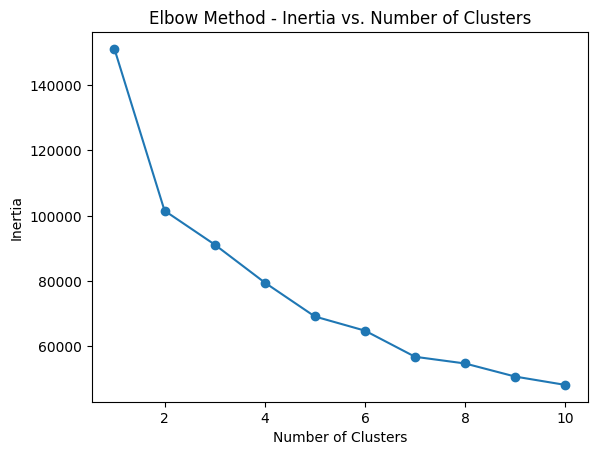

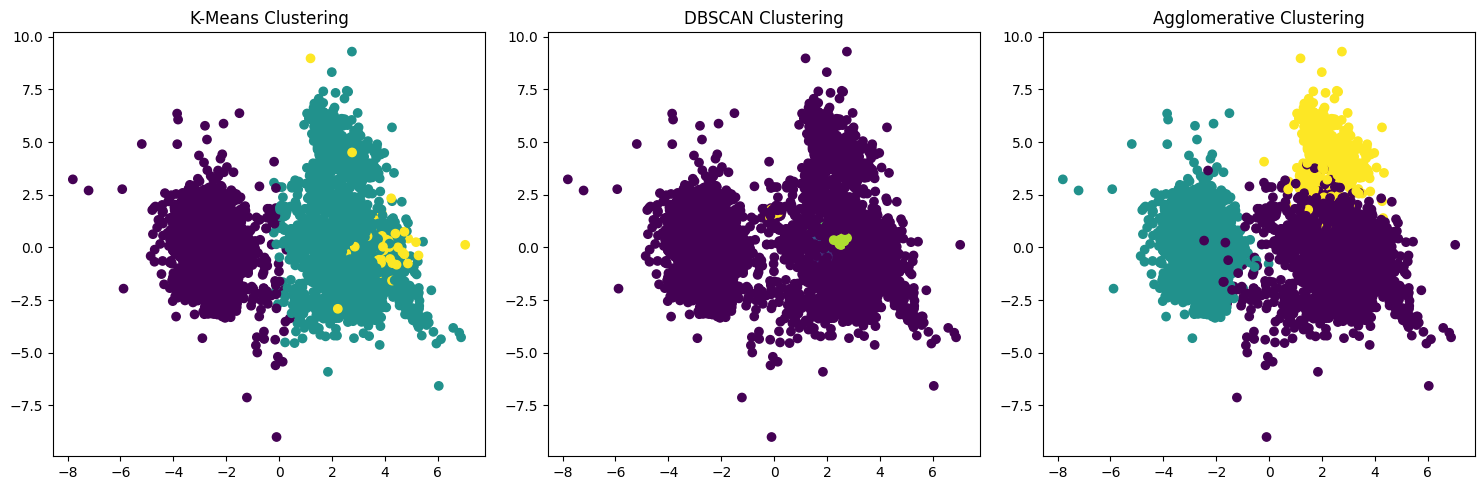

Silhouette Score K-Means: 0.3373141603441815
Silhouette Score DBSCAN: -0.22350837099525983
Silhouette Score Agglomerative: 0.3519120868869338
ARI K-Means: 0.006329473950142554
ARI DBSCAN: -0.04128629676785817
ARI Agglomerative: 0.02760318478477329
DBI K-Means: 1.2363264566696601
DBI DBSCAN: 1.7559635396648272
DBI Agglomerative: 1.2494791838725876

Kesimpulan:
Agglomerative Clustering adalah model clustering terbaik berdasarkan Silhouette Score.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# 1. Load dataset dari file CSV yang Anda masukkan
# Gantilah 'your_dataset.csv' dengan path ke file CSV yang Anda miliki
# Pastikan dataset yang diinput sudah dalam format yang sesuai
dataset = pd.read_csv('/content/drive/MyDrive/Dataset/clusteringweek06.csv')

# Jika dataset Anda memiliki fitur dan label target terpisah (misalnya dalam kolom yang berbeda), pisahkan fitur dan target
# Misal, jika target ada di kolom 'target', dan fitur ada di kolom lainnya
X = dataset.drop(columns=['x1'])  # Ganti 'target' dengan nama kolom target yang ada
y_true = dataset['x1']  # Ganti 'target' dengan nama kolom target yang ada

# 2. Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------
# 3. Pipeline untuk 3 Model Clustering

# K-Means
kmeans_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])

# DBSCAN
dbscan_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dbscan', DBSCAN(eps=0.5, min_samples=5))
])

# Agglomerative Clustering
agglo_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('agglo', AgglomerativeClustering(n_clusters=3))
])

# ---------------------------
# 4. Evaluasi menggunakan Elbow Method untuk K-Means
inertia_values = []
cluster_range = range(1, 11)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method - Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# ---------------------------
# 5. Melakukan Clustering dan Visualisasi Hasil
# K-Means
kmeans_pipeline.fit(X_scaled)
kmeans_labels = kmeans_pipeline['kmeans'].labels_

# DBSCAN
dbscan_pipeline.fit(X_scaled)
dbscan_labels = dbscan_pipeline['dbscan'].labels_

# Agglomerative Clustering
agglo_pipeline.fit(X_scaled)
agglo_labels = agglo_pipeline['agglo'].labels_

# Reduksi dimensi untuk visualisasi 2D menggunakan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualisasi hasil clustering untuk ketiga model
plt.figure(figsize=(15, 5))

# K-Means
plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')

# DBSCAN
plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')

# Agglomerative Clustering
plt.subplot(1, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agglo_labels, cmap='viridis')
plt.title('Agglomerative Clustering')

plt.tight_layout()
plt.show()

# ---------------------------
# 6. Evaluasi menggunakan Silhouette Score, ARI, dan DBI
# Silhouette Score
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
silhouette_dbscan = silhouette_score(X_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
silhouette_agglo = silhouette_score(X_scaled, agglo_labels)

# Adjusted Rand Index (ARI)
ari_kmeans = adjusted_rand_score(y_true, kmeans_labels)
ari_dbscan = adjusted_rand_score(y_true, dbscan_labels)
ari_agglo = adjusted_rand_score(y_true, agglo_labels)

# Davies-Bouldin Index (DBI)
dbi_kmeans = davies_bouldin_score(X_scaled, kmeans_labels)
dbi_dbscan = davies_bouldin_score(X_scaled, dbscan_labels)
dbi_agglo = davies_bouldin_score(X_scaled, agglo_labels)

# Menampilkan hasil evaluasi
print(f"Silhouette Score K-Means: {silhouette_kmeans}")
print(f"Silhouette Score DBSCAN: {silhouette_dbscan}")
print(f"Silhouette Score Agglomerative: {silhouette_agglo}")

print(f"ARI K-Means: {ari_kmeans}")
print(f"ARI DBSCAN: {ari_dbscan}")
print(f"ARI Agglomerative: {ari_agglo}")

print(f"DBI K-Means: {dbi_kmeans}")
print(f"DBI DBSCAN: {dbi_dbscan}")
print(f"DBI Agglomerative: {dbi_agglo}")

# ---------------------------
# 7. Kesimpulan Berdasarkan Evaluasi
print("\nKesimpulan:")
if silhouette_kmeans > silhouette_dbscan and silhouette_kmeans > silhouette_agglo:
    print("K-Means adalah model clustering terbaik berdasarkan Silhouette Score.")
elif silhouette_dbscan > silhouette_kmeans and silhouette_dbscan > silhouette_agglo:
    print("DBSCAN adalah model clustering terbaik berdasarkan Silhouette Score.")
else:
    print("Agglomerative Clustering adalah model clustering terbaik berdasarkan Silhouette Score.")

# Mempertimbangkan ARI dan DBI
if ari_kmeans > ari_dbscan and ari_kmeans > ari_agglo and dbi_kmeans < dbi_dbscan and dbi_kmeans < dbi_agglo:
    print("K-Means juga terbaik berdasarkan ARI dan DBI.")
